<a href="https://colab.research.google.com/github/anacorrea3/Curso_aprendizaje_estadistico/blob/main/Laboratorio_01_pandas_AnaMCorreaCastrill%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Assesment/Laboratorio_01_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio 1.0 : Pandas:

1. Manejo de datos con pandas:

El siguiente [link](
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
), contiene un DataSet con informacion que permite predecir si un cancer es benigno o maligno. Un detalle del dataset es dado a continuación:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

Para el dataset realizar lo siguiente:

1. Leer los datos desde un archivo en el  git_hub.

2. Renombrar las columnas en PascalCase
  Ejemplo: La columna radius_worst, concave points_se deberia llamar: RadiusWorst, ConcavePointsSe

3. Emplear los metodos head, tail, describe,info para obtener información acerca del dataframe,

4. Contabilizar la cantidad de null or nan en el dataframe, replazar por el valor medio de cada columna.

5. Encontrar los valores  diferentes en la columna Diagnosis, mostrar que es B y M. Emplear el metodo unique.

6. Empleando la libreria seaborn y el metodo countplot, realice un conteo de las personas que tiene la etiqueta B y M.

  ```python
  import seaborn as sns
  sns.countplot?
  ```

7. Agregar una nueva columna llamada DiagnosisNumeric, en la que cada valor B, M se corresponde con un valor 0, 1 respectivamente.

8. Elimninar la columna id.

9. Normalizar cada columna respecto a su media y desviación estandar: (x-mean(x))/std(x)

10. En un mismo gráfico mostrar el histograma de la columna RadiusMean  para la etiqueta B y M en color naranja y azul de la columna Diagnosis respectivamente.

11. Para las columnas:
```python
cols=['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean','SmoothnessMean', 'CompactnessMean', 'ConcavityMean','ConcavePointsMean']
```
realizar multiples histograma en un gráfico de [violin](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis",var_name="features",value_name="value")
sns.violinplot(x="features",y="value",  hue="Diagnosis",data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```

12. Determinar los datos [outlier](https://en.wikipedia.org/wiki/Outlier)  para la columna RadiusMean y eliminarlos del data frame, para ello construya un gráfico tipo [boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

```
df.boxplot(column="RadiusMean", by='Diagnosis', sym = 'k.', figsize=(18,6))
```
¿Qué informacion podemos obtener de este tipo de graficos?


Usar el rango intercuartílico (IQR): El IQR es la diferencia entre el tercer y el primer cuartil de los datos, es decir, el 75% y el 25% de los valores ordenados. Los valores que están fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers y se pueden eliminar o reemplazar. Por ejemplo, si queremos eliminar los outliers de una columna llamada 'edad' usando el IQR, podemos hacer lo siguiente

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra forma de determinar los outlier es con el puntaje Z:
El puntaje Z es el número de desviaciones estándar que un valor está por encima o por debajo de la media. Los valores que tienen un puntaje Z mayor que un umbral (por ejemplo, 3) se consideran outliers y se pueden eliminar o reemplazar. Por ejemplo, si queremos eliminar los outliers de la columna 'edad' usando el puntaje Z, podemos hacer lo siguiente:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```

En un problema de machine learning se debe elegir todas las columnas y construir un algoritmo que permite obtener la mejor calidad de los datos sobre todas las columnas.


13. Encontrar la matrix de correlacion, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?



# Laboratorio 1.1: Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.
2. Definir como indice la columna time.
3. Obtenga información del data frame.

4. Determine si hay null, nan en el data frame.

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


```python
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


7. Para el data frame, seleccionemos solo los. datos del 2023.

8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```


Realiza gráfico análogo a esta (referencia)[https://seaborn.pydata.org/examples/kde_ridgeplot.html]















<!--
En este [link](http://berkeleyearth.lbl.gov/auto/Global/Land_and_Ocean_complete.txt) se encuentra un
  data set que tiene información de la temperatura de la tierra desde 1850. Descripción de cada unas de las variables e información es detallada en el interior del archivo.


1. Leer el archivo de datos
2. Construir un dataframe con las columnas:

```
columns = ["Year","Month","MonthlyA","MonthlyUnc","AnnuealA","AnnuealUnc",\
           "FiveA","AnnuealUnc","TenA","AnnuealUnc","TwentyA","AnnuealUnc"]
```
3. Construir una nueva columna tipo string llamada Date con la informacion del Year y Month

4. Emplear el commando [datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) para dar el formato tipo date  a la nueva columna Date.
  
  ```
  df["Date"] = pd.to_datetime(df["Date"],format='%Y%m')
  ```
5. Emplear el metodo groupby and grouper para tomar los datos con un periodicidad mensual. Notese que freq permite variar la periodicidad con la que se quieren mostrar los datos. Pruebe para freq="2M", "3M", "Y", "H".

  ```
  T_serie = df.groupby(pd.Grouper(key='date', freq='M')).mean()
  ```


6. Realice un gráfico del tiempo como función de  MonthlyA.

7. ¿Que puede concluir? -->


Referencias

- [It’s Not Your Imagination. Summers Are Getting Hotter](https://www.nytimes.com/interactive/2021/climate/extreme-summer-heat.html)

- http://berkeleyearth.org/data/

- http://berkeleyearth.lbl.gov/auto/Global/Land_and_Ocean_complete.txt

**SOLUCIÓN DE LABORATORIO 01 PANDAS:**

1) Leer los datos desde un archivo en el git_hub.

In [1]:
import pandas as pd

data= pd.read_csv("https://raw.githubusercontent.com/anacorrea3/Curso_aprendizaje_estadistico/main/datasets/data_cancerWisconsin.csv")

2) Renombrar las columnas en PascalCase Ejemplo: La columna radius_worst, concave points_se deberia llamar: RadiusWorst, ConcavePointsSe

In [2]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [3]:
data.columns = [c.replace("_"," ") for c in data.columns]
data.columns

Index(['id', 'diagnosis', 'radius mean', 'texture mean', 'perimeter mean',
       'area mean', 'smoothness mean', 'compactness mean', 'concavity mean',
       'concave points mean', 'symmetry mean', 'fractal dimension mean',
       'radius se', 'texture se', 'perimeter se', 'area se', 'smoothness se',
       'compactness se', 'concavity se', 'concave points se', 'symmetry se',
       'fractal dimension se', 'radius worst', 'texture worst',
       'perimeter worst', 'area worst', 'smoothness worst',
       'compactness worst', 'concavity worst', 'concave points worst',
       'symmetry worst', 'fractal dimension worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
data_1 = [ cols  for cols in data.columns ]
data_1 = [ [c  for c in cols.split()]   for cols in data.columns ]
data_1 = [ [c.capitalize()  for c in cols.split()]   for cols in data.columns ]
data_1 = [ "".join([c.capitalize() for c in cols.split()])  for cols in data.columns ]
data_1

['Id',
 'Diagnosis',
 'RadiusMean',
 'TextureMean',
 'PerimeterMean',
 'AreaMean',
 'SmoothnessMean',
 'CompactnessMean',
 'ConcavityMean',
 'ConcavePointsMean',
 'SymmetryMean',
 'FractalDimensionMean',
 'RadiusSe',
 'TextureSe',
 'PerimeterSe',
 'AreaSe',
 'SmoothnessSe',
 'CompactnessSe',
 'ConcavitySe',
 'ConcavePointsSe',
 'SymmetrySe',
 'FractalDimensionSe',
 'RadiusWorst',
 'TextureWorst',
 'PerimeterWorst',
 'AreaWorst',
 'SmoothnessWorst',
 'CompactnessWorst',
 'ConcavityWorst',
 'ConcavePointsWorst',
 'SymmetryWorst',
 'FractalDimensionWorst',
 'Unnamed:32']

In [5]:
col = data_1
data.columns = col
data

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,Unnamed:32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


3) Emplear los metodos head, tail, describe,info para obtener información acerca del dataframe.

In [6]:
data.head()

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,Unnamed:32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
data.tail()

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,Unnamed:32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [8]:
data.describe()

,Id,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,...,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,Unnamed:32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     569 non-null    int64  
 1   Diagnosis              569 non-null    object 
 2   RadiusMean             569 non-null    float64
 3   TextureMean            569 non-null    float64
 4   PerimeterMean          569 non-null    float64
 5   AreaMean               569 non-null    float64
 6   SmoothnessMean         569 non-null    float64
 7   CompactnessMean        569 non-null    float64
 8   ConcavityMean          569 non-null    float64
 9   ConcavePointsMean      569 non-null    float64
 10  SymmetryMean           569 non-null    float64
 11  FractalDimensionMean   569 non-null    float64
 12  RadiusSe               569 non-null    float64
 13  TextureSe              569 non-null    float64
 14  PerimeterSe            569 non-null    float64
 15  AreaSe

4) Contabilizar la cantidad de null or nan en el dataframe, replazar por el valor medio de cada columna.

In [10]:
nulos= data.isna().sum()
nulos

Id                         0
Diagnosis                  0
RadiusMean                 0
TextureMean                0
PerimeterMean              0
AreaMean                   0
SmoothnessMean             0
CompactnessMean            0
ConcavityMean              0
ConcavePointsMean          0
SymmetryMean               0
FractalDimensionMean       0
RadiusSe                   0
TextureSe                  0
PerimeterSe                0
AreaSe                     0
SmoothnessSe               0
CompactnessSe              0
ConcavitySe                0
ConcavePointsSe            0
SymmetrySe                 0
FractalDimensionSe         0
RadiusWorst                0
TextureWorst               0
PerimeterWorst             0
AreaWorst                  0
SmoothnessWorst            0
CompactnessWorst           0
ConcavityWorst             0
ConcavePointsWorst         0
SymmetryWorst              0
FractalDimensionWorst      0
Unnamed:32               569
dtype: int64

5) Encontrar los valores diferentes en la columna Diagnosis, mostrar que es B y M. Emplear el metodo unique.

In [11]:
data.Diagnosis.unique()

array(['M', 'B'], dtype=object)

6) Empleando la libreria seaborn y el metodo countplot, realice un conteo de las personas que tiene la etiqueta B y M.

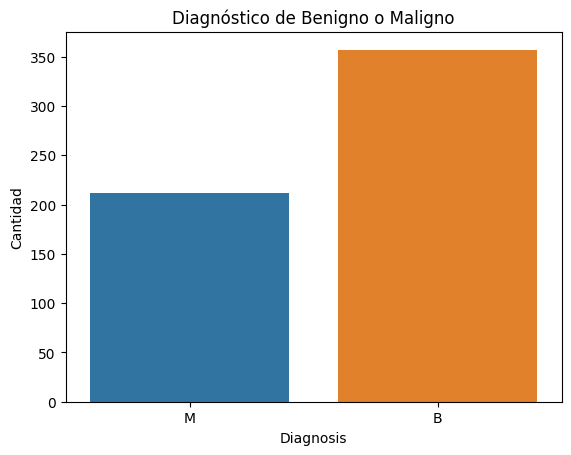

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=data,x='Diagnosis')
plt.ylabel('Cantidad')
plt.xlabel('Diagnosis')
plt.title('Diagnóstico de Benigno o Maligno')
plt.show()

7) Agregar una nueva columna llamada DiagnosisNumeric, en la que cada valor B, M se corresponde con un valor 0, 1 respectivamente.

In [13]:
data["DiagnosisNumeric"] = data["Diagnosis"].apply(lambda x: 0 if x == "B" else 1)
data

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,Unnamed:32,DiagnosisNumeric
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,1


8) Elimninar la columna id.

In [14]:
data = data.drop("Id", axis=1)
data

,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,...,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,Unnamed:32,DiagnosisNumeric
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,1
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,1
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,1
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,1


9) Normalizar cada columna respecto a su media y desviación estandar: (x-mean(x))/std(x)

In [15]:
media = data.drop('Diagnosis', axis=1).mean()
desviacion = data.drop('Diagnosis', axis=1).std()
data_2= (data - media)/desviacion
data_2

,AreaMean,AreaSe,AreaWorst,CompactnessMean,CompactnessSe,CompactnessWorst,ConcavePointsMean,ConcavePointsSe,ConcavePointsWorst,ConcavityMean,...,SmoothnessMean,SmoothnessSe,SmoothnessWorst,SymmetryMean,SymmetrySe,SymmetryWorst,TextureMean,TextureSe,TextureWorst,Unnamed:32
0,0.983510,2.485391,1.999478,3.280628,1.315704,2.614365,2.530249,0.660239,2.294058,2.650542,...,1.567087,-0.213814,1.306537,2.215566,1.147747,2.748204,-2.071512,-0.564768,-1.358098,NaN
1,1.907030,0.741749,1.888827,-0.486643,-0.692317,-0.430066,0.547662,0.259933,1.086129,-0.023825,...,-0.826235,-0.604819,-0.375282,0.001391,-0.804742,-0.243675,-0.353322,-0.875473,-0.368879,NaN
2,1.557513,1.180298,1.455004,1.052000,0.814257,1.081980,2.035440,1.423575,1.953282,1.362280,...,0.941382,-0.296744,0.526944,0.938859,0.236827,1.151242,0.455786,-0.779398,-0.023953,NaN
3,-0.763792,-0.288125,-0.549538,3.399917,2.741868,3.889975,1.450431,1.114027,2.173873,1.914213,...,3.280667,0.689095,3.391291,2.864862,4.728520,6.040726,0.253509,-0.110312,0.133866,NaN
4,1.824624,1.189310,1.219651,0.538866,-0.048477,-0.313119,1.427237,1.143199,0.728618,1.369806,...,0.280125,1.481763,0.220362,-0.009552,-0.360775,-0.867590,-1.150804,-0.789549,-1.465481,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.341795,2.601897,2.013529,0.218868,0.191637,-0.273077,2.318924,2.065360,1.627719,1.945573,...,1.040926,1.085429,0.378033,-0.312314,-1.137415,-1.358963,0.720838,0.070963,0.117596,NaN
565,1.722326,1.290429,1.493644,-0.017817,-0.069697,-0.394473,1.262558,0.807720,0.733182,0.692434,...,0.102368,-0.423637,-0.690623,-0.217473,-0.188995,-0.531387,2.083301,2.258951,2.045599,NaN
566,0.577445,0.180539,0.427529,-0.038646,0.660696,0.350427,0.105684,0.611619,0.413705,0.046547,...,-0.839745,-0.379008,-0.808876,-0.808406,-0.890632,-1.103578,2.043775,-0.257145,1.373645,NaN
567,1.733693,1.008615,1.651717,3.269267,2.015943,3.901415,2.656528,0.785031,2.287972,3.294046,...,1.524426,-0.172848,1.429169,2.135315,0.326346,1.917396,2.334403,0.685485,2.235958,NaN


10) En un mismo gráfico mostrar el histograma de la columna RadiusMean para la etiqueta B y M en color naranja y azul de la columna Diagnosis respectivamente.

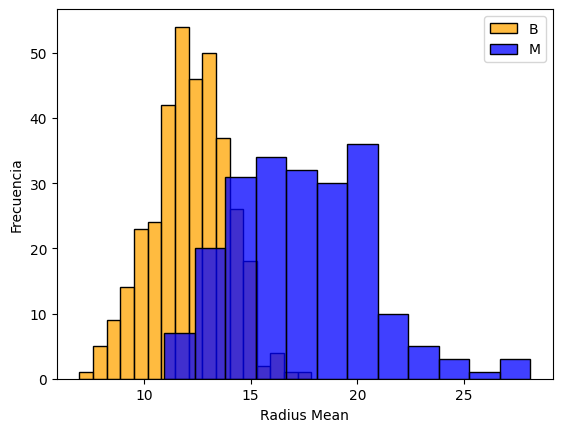

In [16]:
data_B = data[data["Diagnosis"]=="B"]
data_M = data[data["Diagnosis"]=="M"]

sns.histplot(data=data_B, x='RadiusMean', color='orange', label='B')
sns.histplot(data=data_M, x='RadiusMean', color='blue',label= 'M')
plt.xlabel("Radius Mean")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

11) Para las columnas:
```python
cols=['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean','SmoothnessMean', 'CompactnessMean', 'ConcavityMean','ConcavePointsMean']
```
realizar multiples histograma en un gráfico de [violin](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis",var_name="features",value_name="value")
sns.violinplot(x="features",y="value",  hue="Diagnosis",data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```

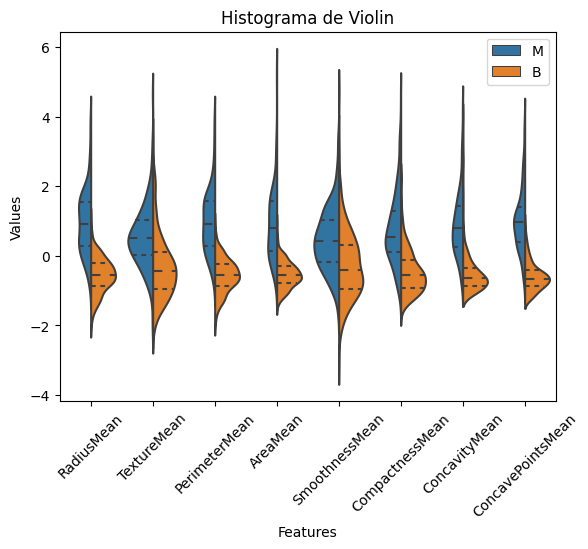

In [17]:
data.iloc[:,1:9] = data.iloc[:,1:9].apply(lambda x: (x-x.mean())/x.std(), axis=0)
datos = pd.melt(data.iloc[:, 0:9], id_vars="Diagnosis",var_name="features",value_name="value")
sns.violinplot(x="features",y="value",  hue="Diagnosis",data=datos, split=True, inner="quart")
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Histograma de Violin')
plt.legend()
plt.show()

12) Determinar los datos [outlier](https://en.wikipedia.org/wiki/Outlier)  para la columna RadiusMean y eliminarlos del data frame, para ello construya un gráfico tipo [boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

```
df.boxplot(column="RadiusMean", by='Diagnosis', sym = 'k.', figsize=(18,6))
```
¿Qué informacion podemos obtener de este tipo de graficos?


Usar el rango intercuartílico (IQR): El IQR es la diferencia entre el tercer y el primer cuartil de los datos, es decir, el 75% y el 25% de los valores ordenados. Los valores que están fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers y se pueden eliminar o reemplazar. Por ejemplo, si queremos eliminar los outliers de una columna llamada 'edad' usando el IQR, podemos hacer lo siguiente

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra forma de determinar los outlier es con el puntaje Z:
El puntaje Z es el número de desviaciones estándar que un valor está por encima o por debajo de la media. Los valores que tienen un puntaje Z mayor que un umbral (por ejemplo, 3) se consideran outliers y se pueden eliminar o reemplazar. Por ejemplo, si queremos eliminar los outliers de la columna 'edad' usando el puntaje Z, podemos hacer lo siguiente:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```

En un problema de machine learning se debe elegir todas las columnas y construir un algoritmo que permite obtener la mejor calidad de los datos sobre todas las columnas.

<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

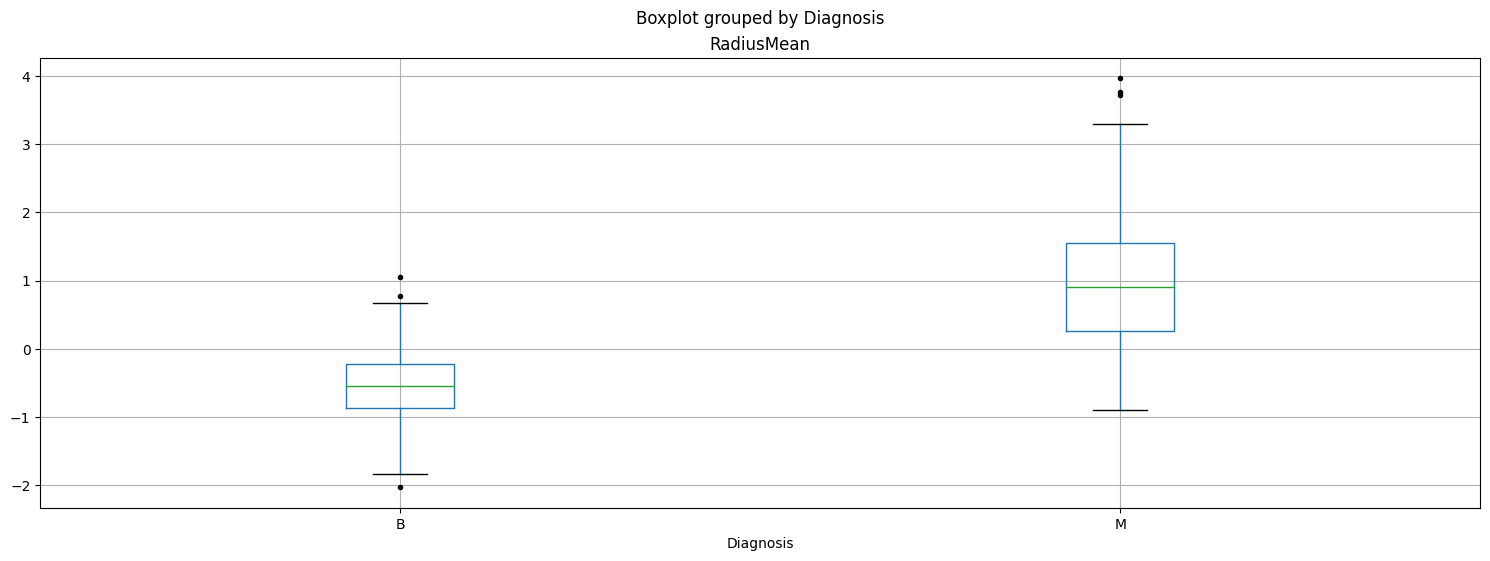

In [18]:
data.boxplot(column="RadiusMean", by='Diagnosis', sym = 'k.', figsize=(18,6))

In [19]:
Q1 = data['RadiusMean'].quantile(0.25)
Q3 = data['RadiusMean'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['RadiusMean'] < (Q1 - 1.5 * IQR)) | (data['RadiusMean'] > (Q3 + 1.5 * IQR)))]
data

,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,...,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,Unnamed:32,DiagnosisNumeric
0,M,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,0.2419,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN,1
1,M,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.1812,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN,1
2,M,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.2069,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN,1
3,M,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,0.2597,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN,1
4,M,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,0.1809,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,0.1726,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,1
565,M,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,0.1752,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,1
566,M,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,0.1590,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,1
567,M,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,0.2397,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,1


<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

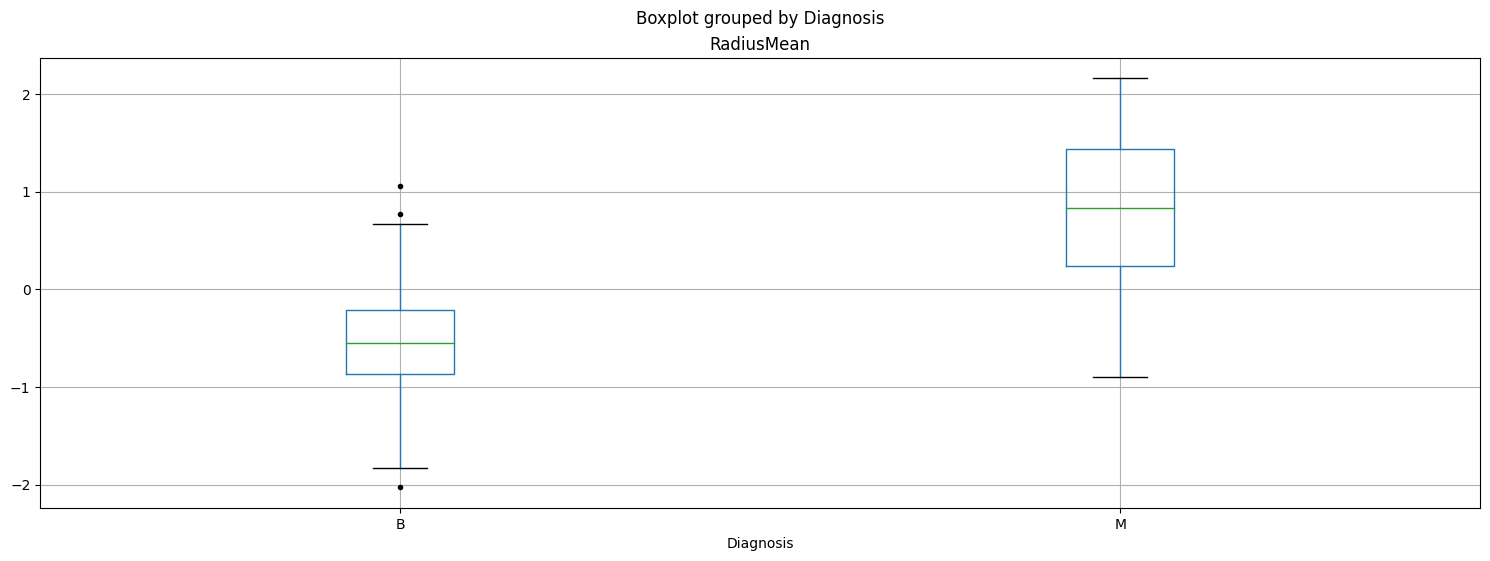

In [20]:
data.boxplot(column="RadiusMean", by='Diagnosis', sym = 'k.', figsize=(18,6))

13) Encontrar la matrix de correlacion, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

In [21]:
data_3= data.drop('Diagnosis',axis=1).corr()


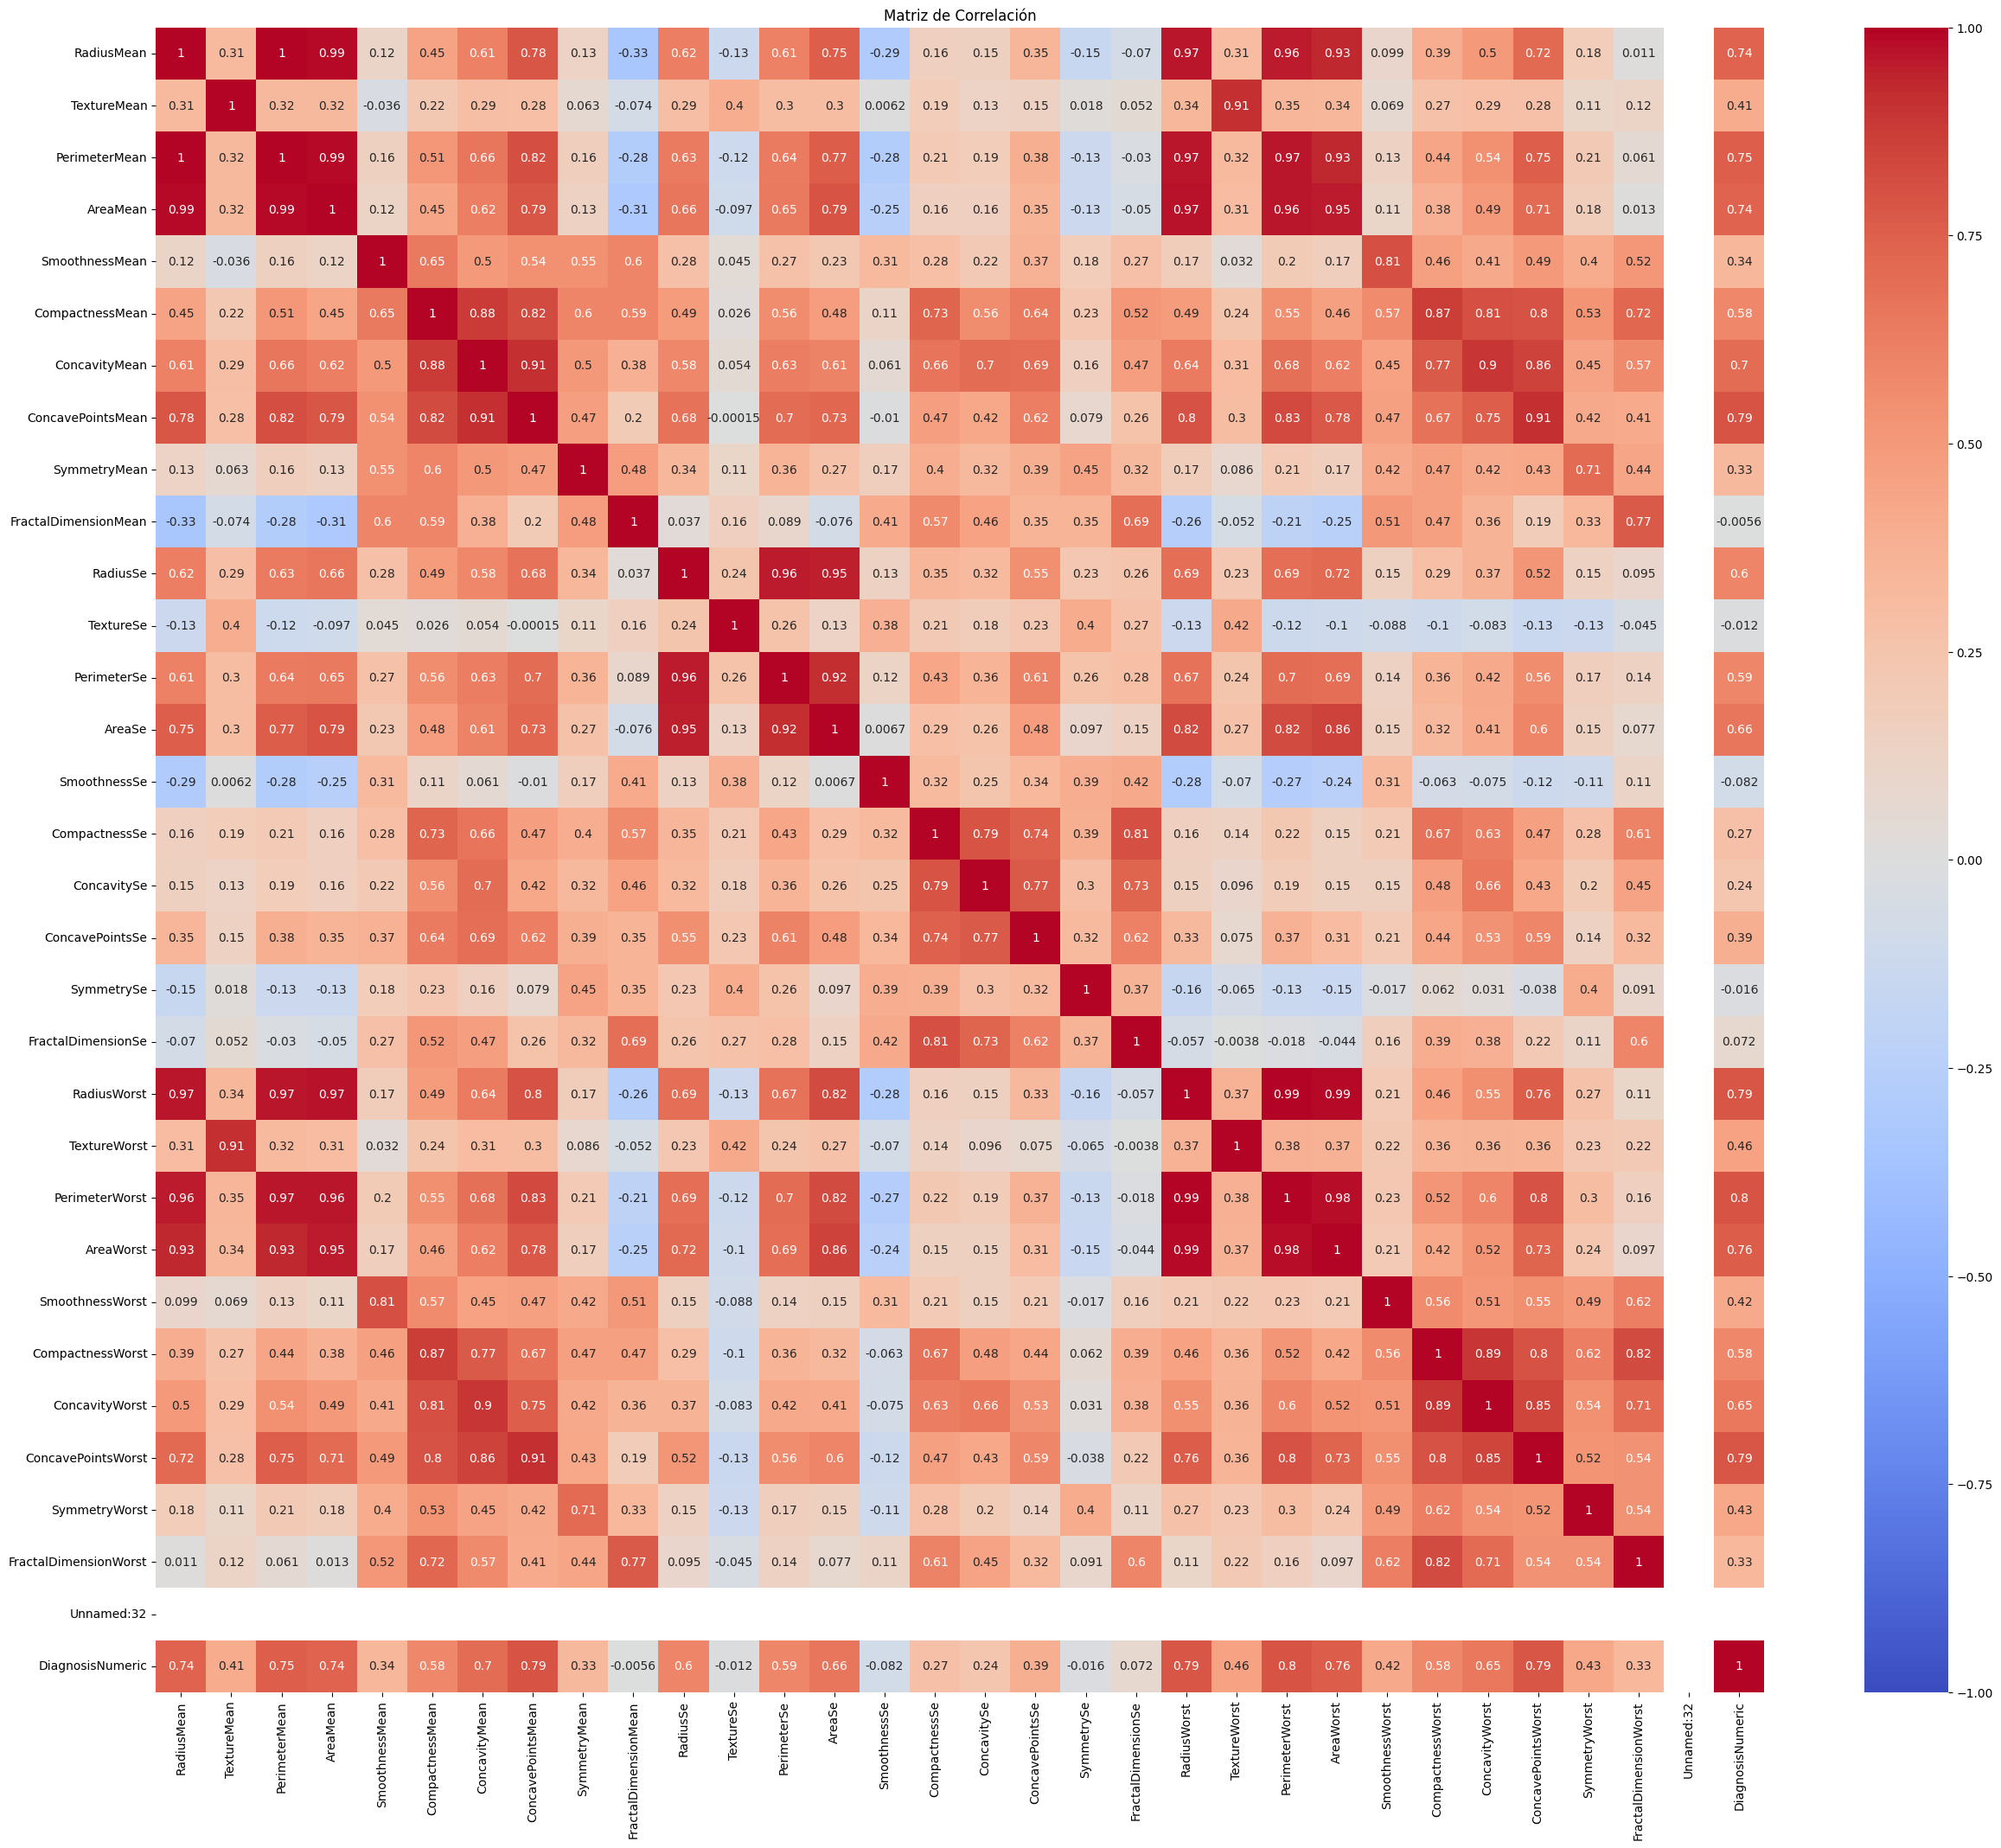

In [22]:
plt.figure(figsize=(30, 25))
sns.heatmap(data_3, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()

14) ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?

Se pueden realizar por ejemplo:



*   Gráficos de densidad: Muestran la densidad estimada de una variable numérica.
*   Gráficos de pastel: Se usan para mostrar la proporción de diferentes categorías en un conjunto de datos .
*   Gráficos de dispersión: Relación entre dos variables numéricas.
*   Gráficas de líneas: Relación entre dos variables a través del tiempo o un eje continúo.
*   Gráficos de mosaico: Se usan para visualizar la relación entre dos variables categóricas y la distribución de subcategorías.

**SERIES DE TIEMPO**

1) Leer el dataset desde el github.








In [23]:
data_monedas= pd.read_csv("https://raw.githubusercontent.com/anacorrea3/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv")
data_monedas

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
0,0,2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
1,1,2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2,2,2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
3,3,2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
4,4,2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
4996,4996,2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
4997,4997,2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075
4998,4998,2023-05-12 22:00:00,1.08531,1.08549,1.08506,1.08518,1374,8,0,1.085245,-0.00013,-0.00015,-0.000140


2)Definir como índice la columna time

In [24]:
data_monedas = data_monedas.set_index('time')
data_monedas

,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,,
2022-07-25 13:00:00,0,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,2,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,3,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,4,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 19:00:00,4995,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
2023-05-12 20:00:00,4996,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
2023-05-12 21:00:00,4997,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075


3) Obtenga información del data frame.

In [25]:
shape_ = data_monedas.shape
info_ = data_monedas.info
dtypes_ = data_monedas.dtypes
describe_ = data_monedas.describe

print(shape_,info_,dtypes_, describe_)

(5000, 12) <bound method DataFrame.info of                      Unnamed: 0     open     high      low    close  \
time                                                                  
2022-07-25 13:00:00           0  1.02427  1.02430  1.02145  1.02345   
2022-07-25 14:00:00           1  1.02345  1.02578  1.02288  1.02299   
2022-07-25 15:00:00           2  1.02303  1.02476  1.02230  1.02457   
2022-07-25 16:00:00           3  1.02454  1.02548  1.02355  1.02485   
2022-07-25 17:00:00           4  1.02485  1.02514  1.02030  1.02181   
...                         ...      ...      ...      ...      ...   
2023-05-12 19:00:00        4995  1.08552  1.08569  1.08485  1.08514   
2023-05-12 20:00:00        4996  1.08516  1.08567  1.08502  1.08546   
2023-05-12 21:00:00        4997  1.08546  1.08546  1.08487  1.08531   
2023-05-12 22:00:00        4998  1.08531  1.08549  1.08506  1.08518   
2023-05-12 23:00:00        4999  1.08521  1.08522  1.08478  1.08494   

                     tick_volume 

4) Determine si hay null, nan en el data frame.

In [26]:
nulos_ = data_monedas.isnull().any()
nulos_

Unnamed: 0            False
open                  False
high                  False
low                   False
close                 False
tick_volume           False
spread                False
real_volume           False
MeanCloseOpen         False
Diff_Close            False
Diff_Open             False
Diff_MeanCloseOpen    False
dtype: bool

In [27]:
data_monedas.fillna('NaN').any()

Unnamed: 0             True
open                   True
high                   True
low                    True
close                  True
tick_volume            True
spread                 True
real_volume           False
MeanCloseOpen          True
Diff_Close             True
Diff_Open              True
Diff_MeanCloseOpen     True
dtype: bool

5) Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.

In [28]:
data_close = pd.DataFrame([data_monedas.close]).T

data_close1 = [ cols  for cols in data_close.columns ]
data_close1 = [ [c  for c in cols.split()]   for cols in data_close.columns ]
data_close1 = [ [c.capitalize()  for c in cols.split()]   for cols in data_close.columns ]
data_close1 = [ "".join([c.capitalize() for c in cols.split()])  for cols in data_close.columns ]
data_close1

['Close']

In [29]:
data_close.columns= data_close1
data_close

,Close
time,
2022-07-25 13:00:00,1.02345
2022-07-25 14:00:00,1.02299
2022-07-25 15:00:00,1.02457
2022-07-25 16:00:00,1.02485
2022-07-25 17:00:00,1.02181
...,...
2023-05-12 19:00:00,1.08514
2023-05-12 20:00:00,1.08546
2023-05-12 21:00:00,1.08531


6) Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


```python
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


In [30]:
data_close["DiffPrice"] = data_monedas["Diff_Close"]
data_close

,Close,DiffPrice
time,,
2022-07-25 13:00:00,1.02345,-0.00046
2022-07-25 14:00:00,1.02299,-0.00046
2022-07-25 15:00:00,1.02457,0.00158
2022-07-25 16:00:00,1.02485,0.00028
2022-07-25 17:00:00,1.02181,-0.00304
...,...,...
2023-05-12 19:00:00,1.08514,-0.00038
2023-05-12 20:00:00,1.08546,0.00032
2023-05-12 21:00:00,1.08531,-0.00015


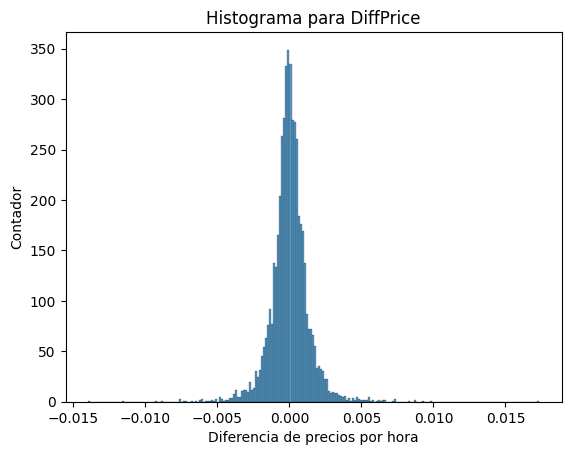

In [31]:
datos_diff= data_close['DiffPrice']
sns.histplot(datos_diff)
plt.xlabel("Diferencia de precios por hora")
plt.ylabel("Contador")
plt.title('Histograma para DiffPrice')
plt.show()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,23157.930567,-311.400556,-298.366170,inf,0.042443,2.900065e-08
lognorm,106584.812707,3075.010476,3094.562056,inf,0.091642,5.425231e-37
norm,106822.330973,3181.756227,3194.790614,inf,0.090581,3.782515e-36
chi2,465643.990315,7.690701,27.242280,inf,0.303492,0.000000e+00
exponpow,678897.973320,252.158350,271.709930,inf,0.532577,0.000000e+00


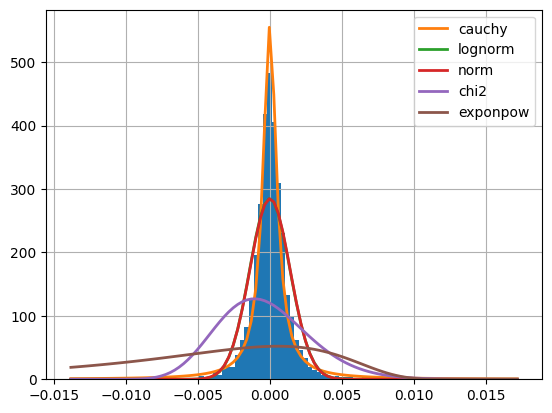

In [32]:
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data_close['DiffPrice'],
           distributions=['cauchy', 'chi2', 'expon', 'exponpow', 'gamma', 'lognorm', 'norm', 'powerlaw', 'rayleigh', 'uniform'])
f.fit()
f.summary()

In [33]:
# Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
# Indentificamos parametros de la distrubicion beta
#f.fitted_param["beta"]

{'cauchy': {'loc': -4.008842468261712e-06, 'scale': 0.000571510620117188}}

In [34]:
f.fitted_param["cauchy"]

(-4.008842468261712e-06, 0.000571510620117188)

7) Para el data frame, seleccionemos solo los datos del 2023.

In [35]:
data_close2= data_close[data_close.index > '2023']
data_close2

,Close,DiffPrice
time,,
2023-01-02 0:00:00,1.06796,-0.00200
2023-01-02 1:00:00,1.06965,0.00169
2023-01-02 2:00:00,1.07058,0.00093
2023-01-02 3:00:00,1.06896,-0.00162
2023-01-02 4:00:00,1.06880,-0.00016
...,...,...
2023-05-12 19:00:00,1.08514,-0.00038
2023-05-12 20:00:00,1.08546,0.00032
2023-05-12 21:00:00,1.08531,-0.00015


8) El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```



In [36]:
data_close2.index = pd.to_datetime(data_close2.index)
quince= data_close2.groupby(pd.Grouper(level= 'time', freq='15D')).mean()
quince

,Close,DiffPrice
time,,
2023-01-02,1.069361,0.000047
2023-01-17,1.085565,0.000015
2023-02-01,1.077679,-0.000066
2023-02-16,1.063150,-0.000034
2023-03-03,1.063186,0.000026
2023-03-18,1.080936,0.000074
2023-04-02,1.093090,0.000063
2023-04-17,1.099084,-0.000006
2023-05-02,1.098889,-0.000059


In [37]:
semana = data_close2.groupby(pd.Grouper(level= 'time', freq='1W')).mean()
semana

,Close,DiffPrice
time,,
2023-01-08,1.059972,-0.000047
2023-01-15,1.076002,0.000156
2023-01-22,1.082041,0.000020
2023-01-29,1.088414,0.000010
2023-02-05,1.089281,-0.000062
2023-02-12,1.073363,-0.000097
2023-02-19,1.069648,0.000014
2023-02-26,1.063374,-0.000124
2023-03-05,1.060854,0.000073


In [38]:
mes= data_close2.groupby(pd.Grouper(level= 'time', freq='1M')).mean()
mes

,Close,DiffPrice
time,,
2023-01-31,1.077463,0.000031
2023-02-28,1.071167,-0.000060
2023-03-31,1.070874,0.000049
2023-04-30,1.096051,0.000036
2023-05-31,1.098980,-0.000069


9) Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```


Realiza gráfico análogo a esta (referencia)[https://seaborn.pydata.org/examples/kde_ridgeplot.html]




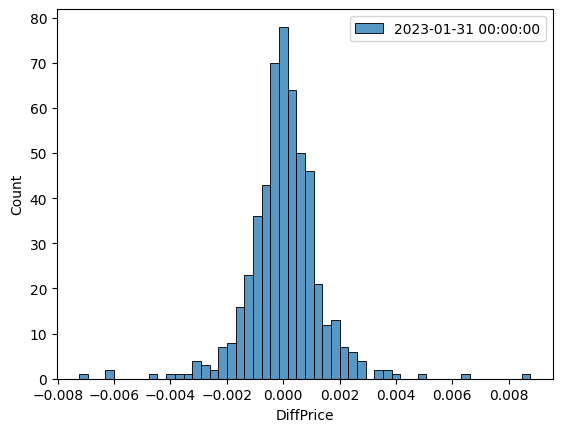

2023-01-31 00:00:00                        Close  DiffPrice
time                                   
2023-01-02 00:00:00  1.06796   -0.00200
2023-01-02 01:00:00  1.06965    0.00169
2023-01-02 02:00:00  1.07058    0.00093
2023-01-02 03:00:00  1.06896   -0.00162
2023-01-02 04:00:00  1.06880   -0.00016
...                      ...        ...
2023-01-31 19:00:00  1.08651    0.00081
2023-01-31 20:00:00  1.08724    0.00073
2023-01-31 21:00:00  1.08641   -0.00083
2023-01-31 22:00:00  1.08724    0.00083
2023-01-31 23:00:00  1.08618   -0.00106

[528 rows x 2 columns]


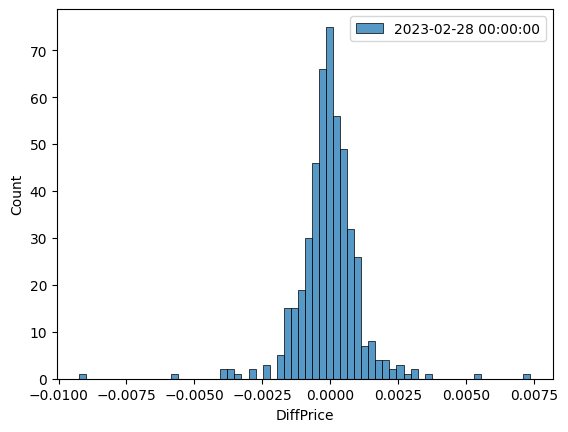

2023-02-28 00:00:00                        Close  DiffPrice
time                                   
2023-02-01 00:00:00  1.08598   -0.00020
2023-02-01 01:00:00  1.08607    0.00009
2023-02-01 02:00:00  1.08624    0.00017
2023-02-01 03:00:00  1.08573   -0.00051
2023-02-01 04:00:00  1.08540   -0.00033
...                      ...        ...
2023-02-28 19:00:00  1.06055    0.00049
2023-02-28 20:00:00  1.05913   -0.00142
2023-02-28 21:00:00  1.05835   -0.00078
2023-02-28 22:00:00  1.05760   -0.00075
2023-02-28 23:00:00  1.05741   -0.00019

[480 rows x 2 columns]


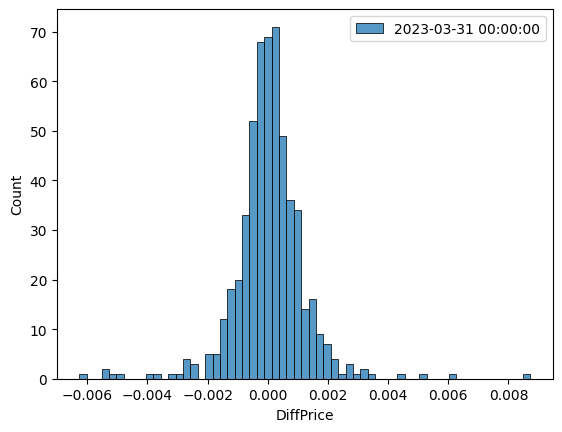

2023-03-31 00:00:00                        Close  DiffPrice
time                                   
2023-03-01 00:00:00  1.05767    0.00026
2023-03-01 01:00:00  1.05769    0.00002
2023-03-01 02:00:00  1.05682   -0.00087
2023-03-01 03:00:00  1.05843    0.00161
2023-03-01 04:00:00  1.05833   -0.00010
...                      ...        ...
2023-03-31 19:00:00  1.08693   -0.00024
2023-03-31 20:00:00  1.08531   -0.00162
2023-03-31 21:00:00  1.08552    0.00021
2023-03-31 22:00:00  1.08457   -0.00095
2023-03-31 23:00:00  1.08413   -0.00044

[550 rows x 2 columns]


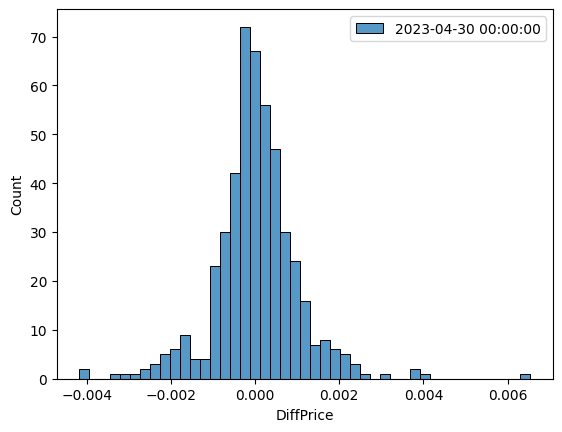

2023-04-30 00:00:00                        Close  DiffPrice
time                                   
2023-04-03 00:00:00  1.08406   -0.00007
2023-04-03 01:00:00  1.08194   -0.00212
2023-04-03 02:00:00  1.08025   -0.00169
2023-04-03 03:00:00  1.08137    0.00112
2023-04-03 04:00:00  1.08075   -0.00062
...                      ...        ...
2023-04-28 19:00:00  1.10306   -0.00089
2023-04-28 20:00:00  1.10238   -0.00068
2023-04-28 21:00:00  1.10170   -0.00068
2023-04-28 22:00:00  1.10194    0.00024
2023-04-28 23:00:00  1.10159   -0.00035

[480 rows x 2 columns]


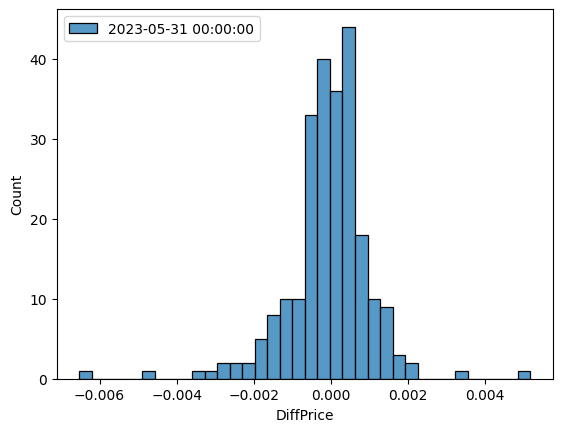

2023-05-31 00:00:00                        Close  DiffPrice
time                                   
2023-05-01 00:00:00  1.10189    0.00030
2023-05-01 01:00:00  1.10115   -0.00074
2023-05-01 02:00:00  1.10106   -0.00009
2023-05-01 03:00:00  1.10054   -0.00052
2023-05-01 04:00:00  1.10039   -0.00015
...                      ...        ...
2023-05-12 19:00:00  1.08514   -0.00038
2023-05-12 20:00:00  1.08546    0.00032
2023-05-12 21:00:00  1.08531   -0.00015
2023-05-12 22:00:00  1.08518   -0.00013
2023-05-12 23:00:00  1.08494   -0.00024

[240 rows x 2 columns]


In [39]:
mes_=data_close2.groupby(pd.Grouper(level='time', freq='1M'))

for name, group in mes_:
  sns.histplot(group.DiffPrice,label=name)
  plt.legend()
  plt.show()
  print(name, group)

